# EDA & Data Cleansing

https://www.kaggle.com/datasets/bhavikjikadara/heart-failure-prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Heart-Failure-Prediction/heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## ตรวจสอบ Missing Value

In [ ]:
# ตรวจสอบ na ในข้อมูล
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
print((df.isna().sum()/len(df))*100)

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64


ข้อมูลไม่มี Missing Value

## ดูแต่ละ Column

### age

Text(0, 0.5, 'Count')

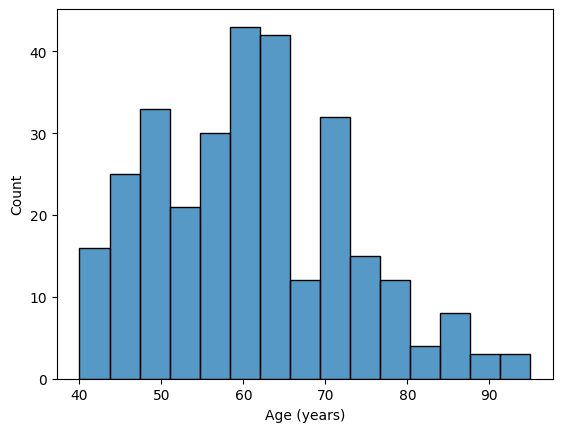

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
age_plot = sns.histplot(df['age'],
             bins=15,
             kde=False
            )
age_plot.set_xlabel("Age (years)")
age_plot.set_ylabel("Count")

<Axes: xlabel='age'>

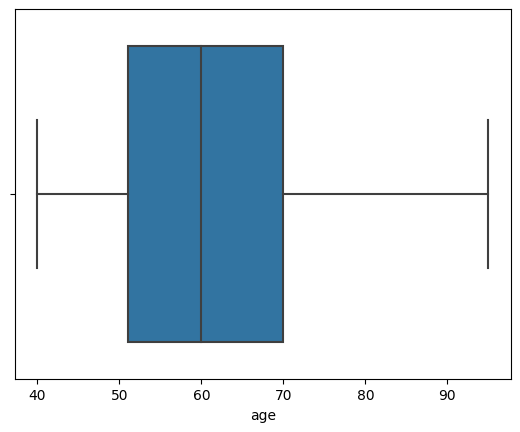

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'age')

ในข้อมูลนี้มี อายุน้อยที่สุดคือ 40 ส่วนมากที่สุดคือ 90 กว่า ๆ

### anaemia

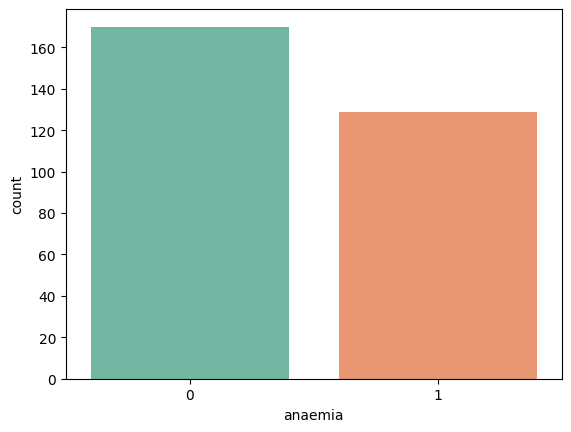

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['anaemia'], data=df, palette="Set2")

In [ ]:
pd.crosstab(df['anaemia'], columns='Count')

col_0,Count
anaemia,
0,170
1,129


### creatinine_phosphokinase

Text(0, 0.5, 'Count')

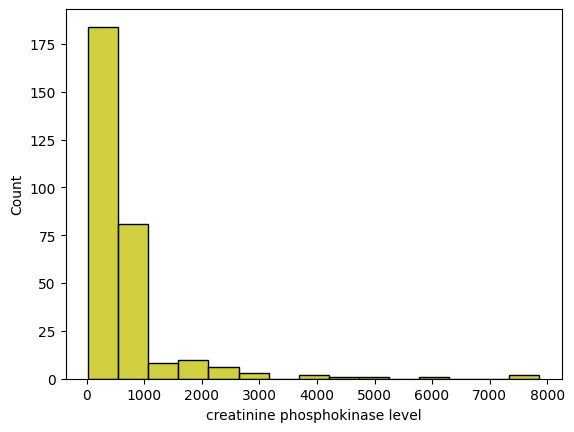

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['creatinine_phosphokinase'],
             bins=15,
             kde=False,
             color="y"
            )
bmi_plot.set_xlabel("creatinine phosphokinase level")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='creatinine_phosphokinase'>

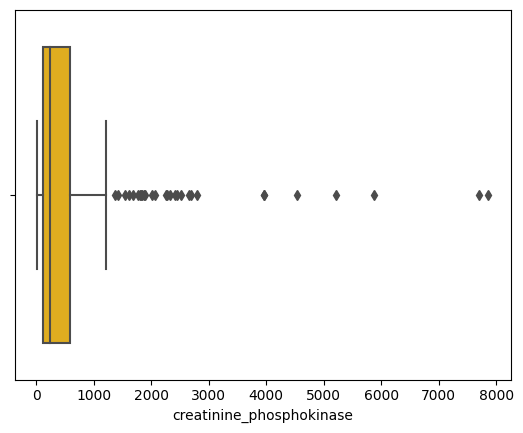

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'creatinine_phosphokinase', palette="Wistia")

หลายคนมีค่า creatinine phosphokinase ที่สูงเกินไปมาก ๆ สูงสุดคือ เกือบ 8000 เลย

### diabetes

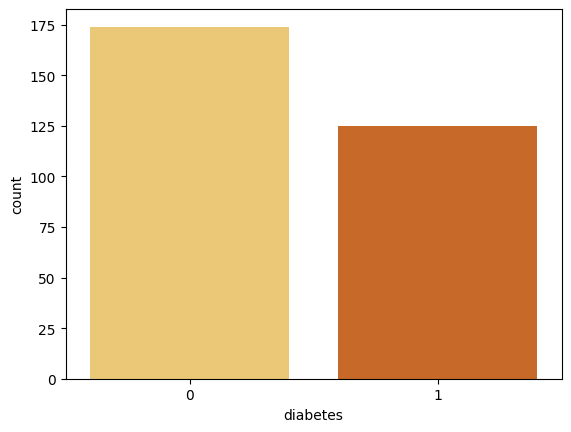

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['diabetes'], data=df, palette="YlOrBr")

### ejection_fraction

Text(0, 0.5, 'Count')

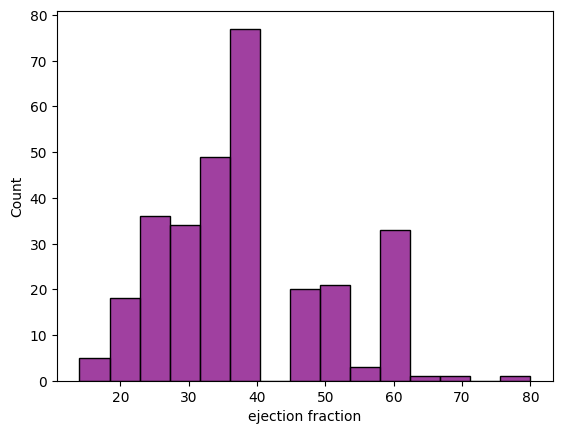

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['ejection_fraction'],
             bins=15,
             kde=False,
             color="purple"
            )
bmi_plot.set_xlabel("ejection fraction")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='ejection_fraction'>

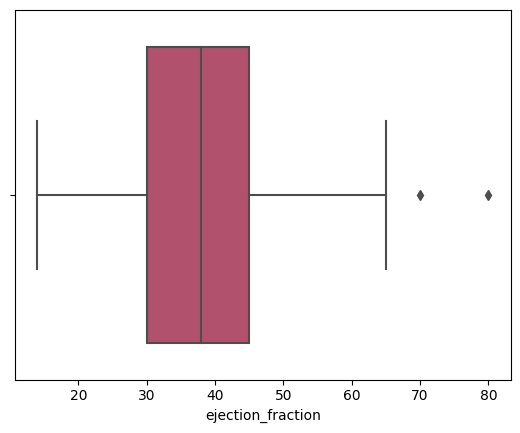

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'ejection_fraction', palette="flare")

### high_blood_pressure

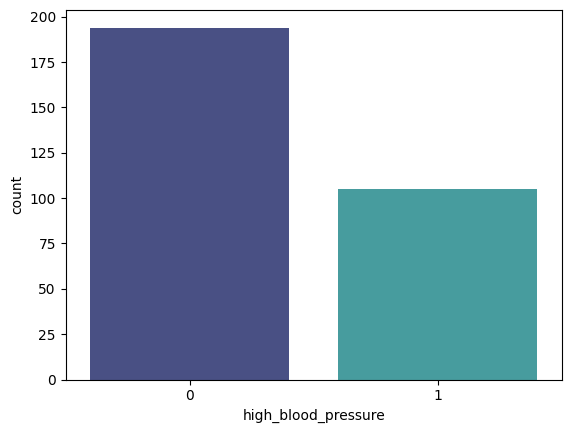

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['high_blood_pressure'], data=df, palette="mako")

### platelets

Text(0, 0.5, 'Count')

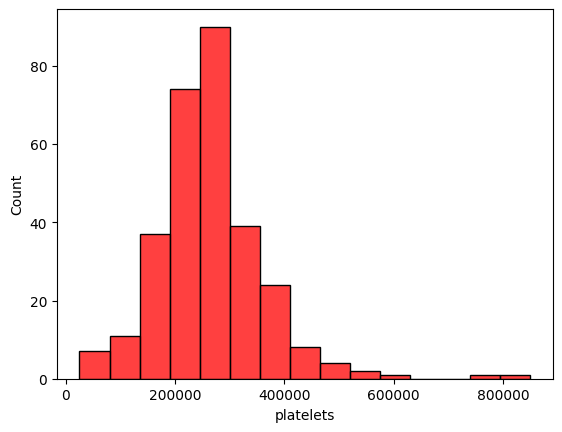

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['platelets'],
             bins=15,
             kde=False,
             color="red"
            )
bmi_plot.set_xlabel("platelets")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='platelets'>

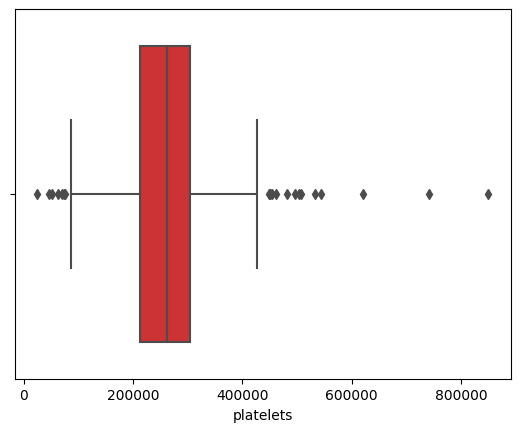

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'platelets', palette="Set1")

### serum_creatinine

Text(0, 0.5, 'Count')

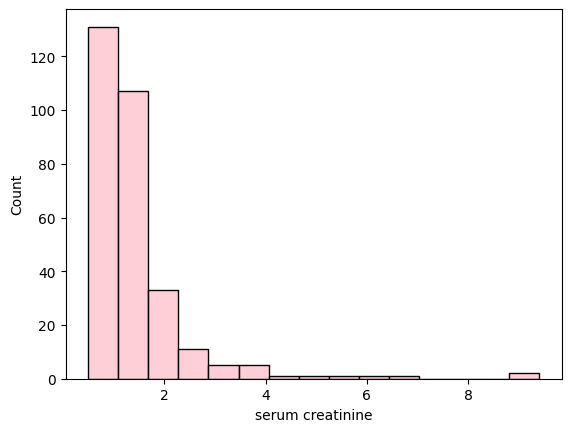

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['serum_creatinine'],
             bins=15,
             kde=False,
             color="pink"
            )
bmi_plot.set_xlabel("serum creatinine")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='serum_creatinine'>

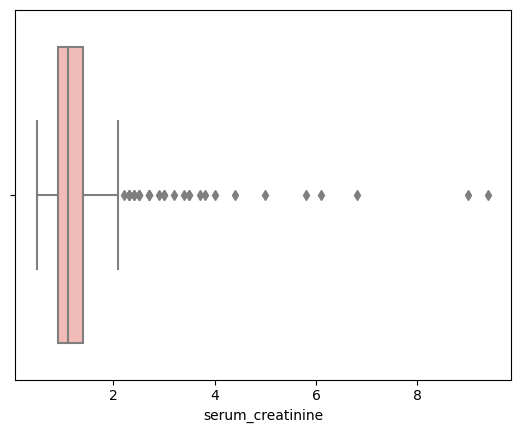

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'serum_creatinine', palette="Pastel1")

### serum_sodium

Text(0, 0.5, 'Count')

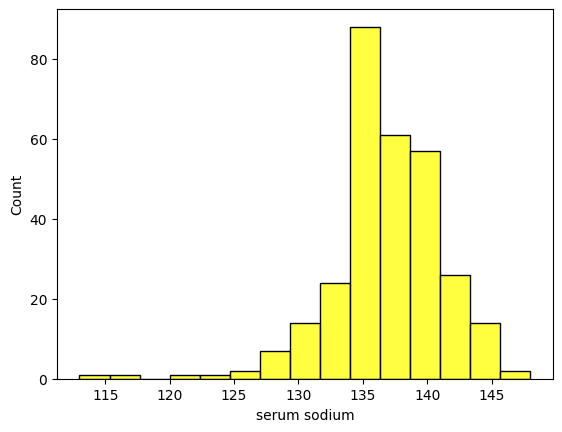

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['serum_sodium'],
             bins=15,
             kde=False,
             color="yellow"
            )
bmi_plot.set_xlabel("serum sodium")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='serum_sodium'>

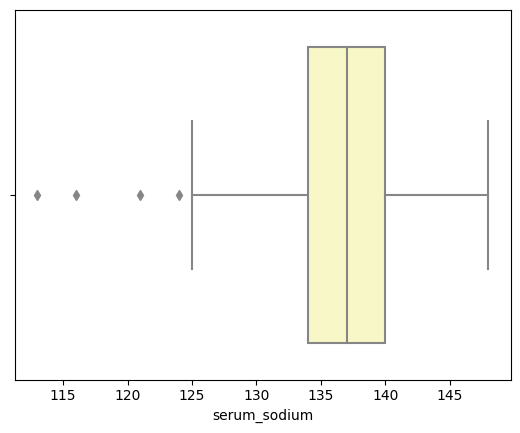

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'serum_sodium', palette="RdYlBu")

### sex

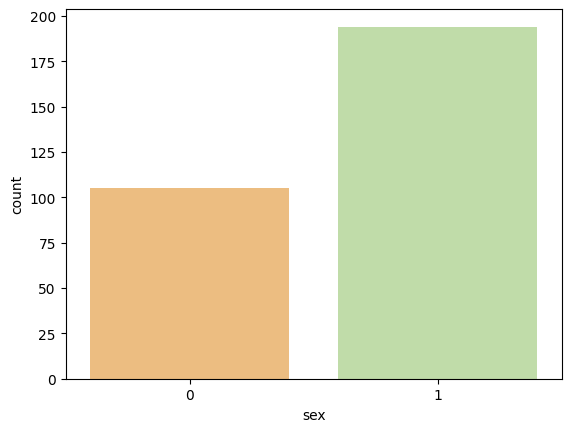

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['sex'], data=df, palette="Spectral")

### smoking

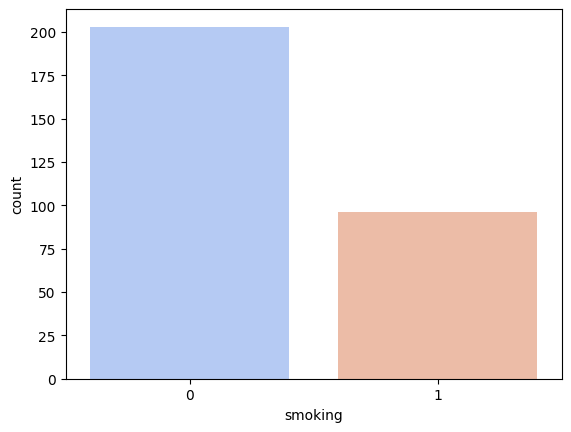

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['smoking'], data=df, palette="coolwarm")

### time

Text(0, 0.5, 'Count')

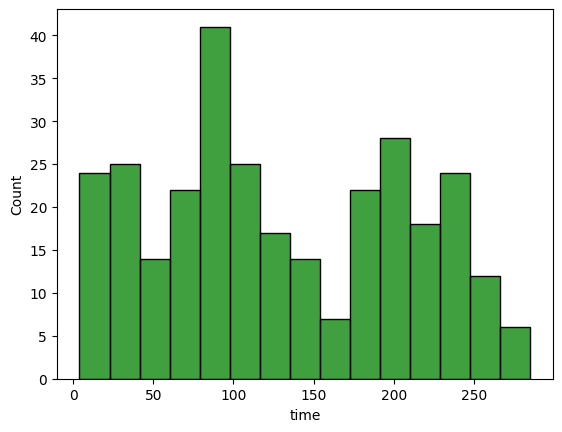

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bmi_plot = sns.histplot(df['time'],
             bins=15,
             kde=False,
             color="green"
            )
bmi_plot.set_xlabel("time")
bmi_plot.set_ylabel("Count")

<Axes: xlabel='time'>

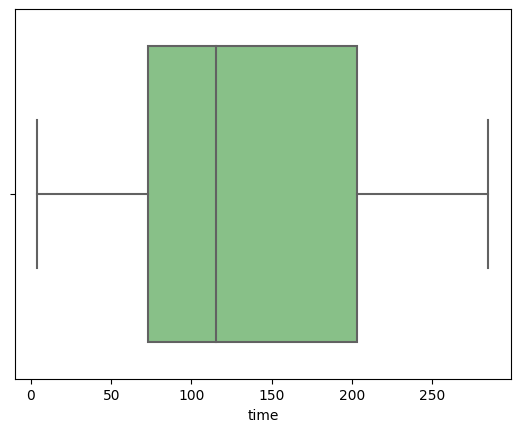

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'time', palette="Accent")

### DEATH_EVENT

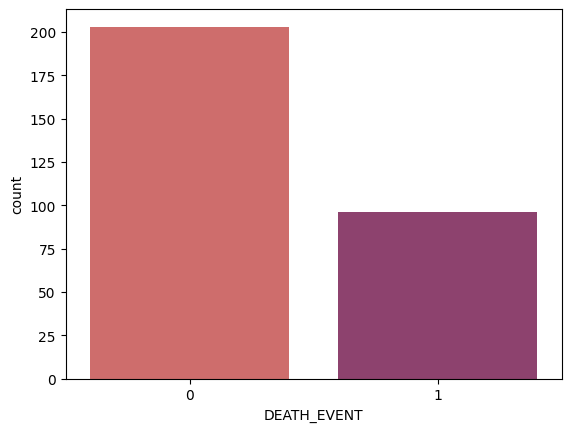

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['DEATH_EVENT'], data=df, palette="flare")

In [ ]:
pd.crosstab(df['DEATH_EVENT'], columns='Count')

col_0,Count
DEATH_EVENT,
0,203
1,96


ข้อมูลนี้เป็น imbalance data โดย class 0 (normal) มากกว่า class 1 (heart disease)

## Correlation

<Axes: >

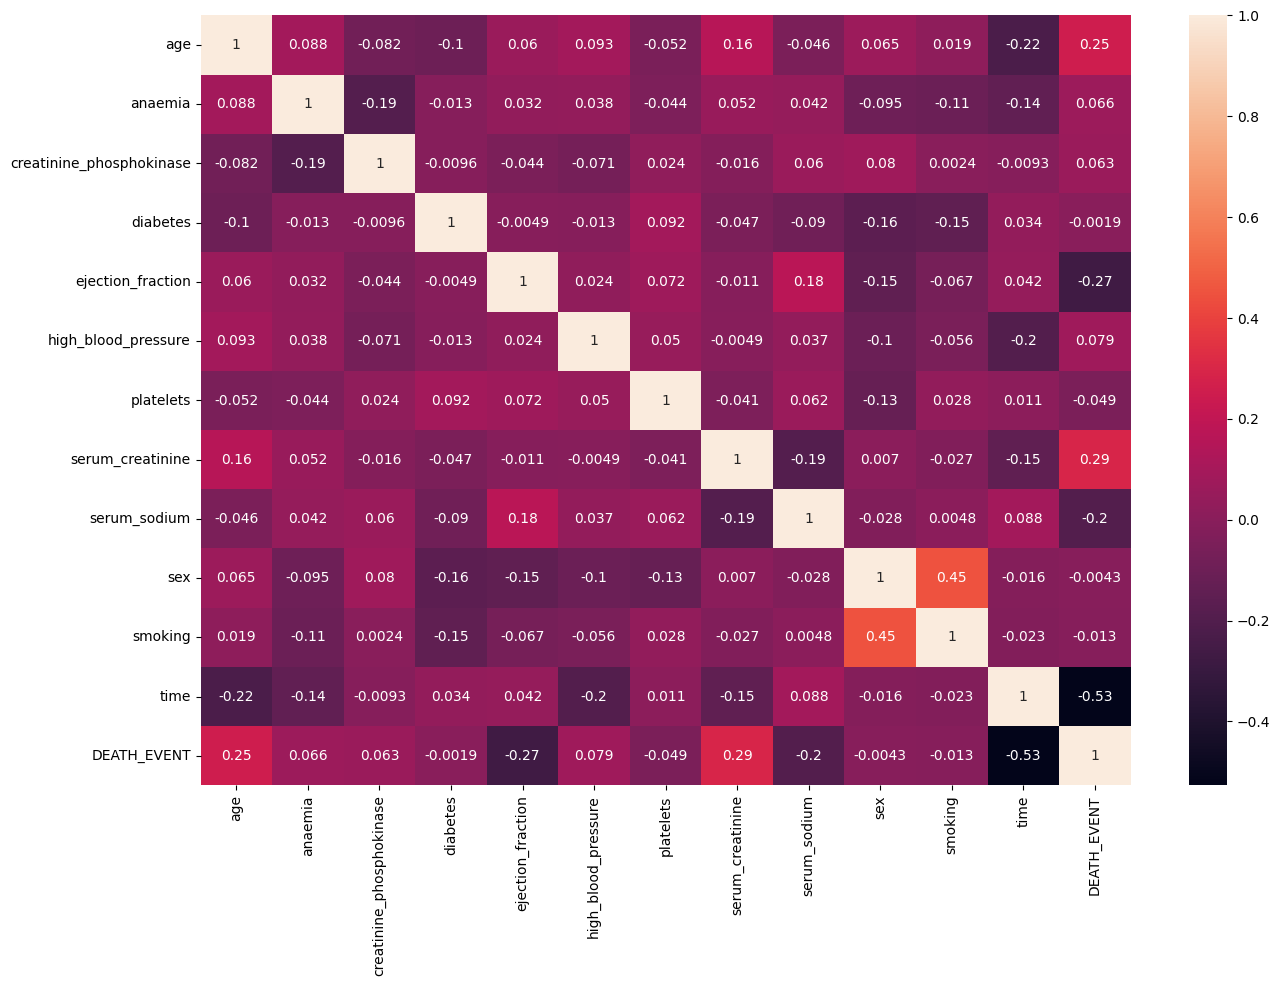

In [ ]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

<Axes: >

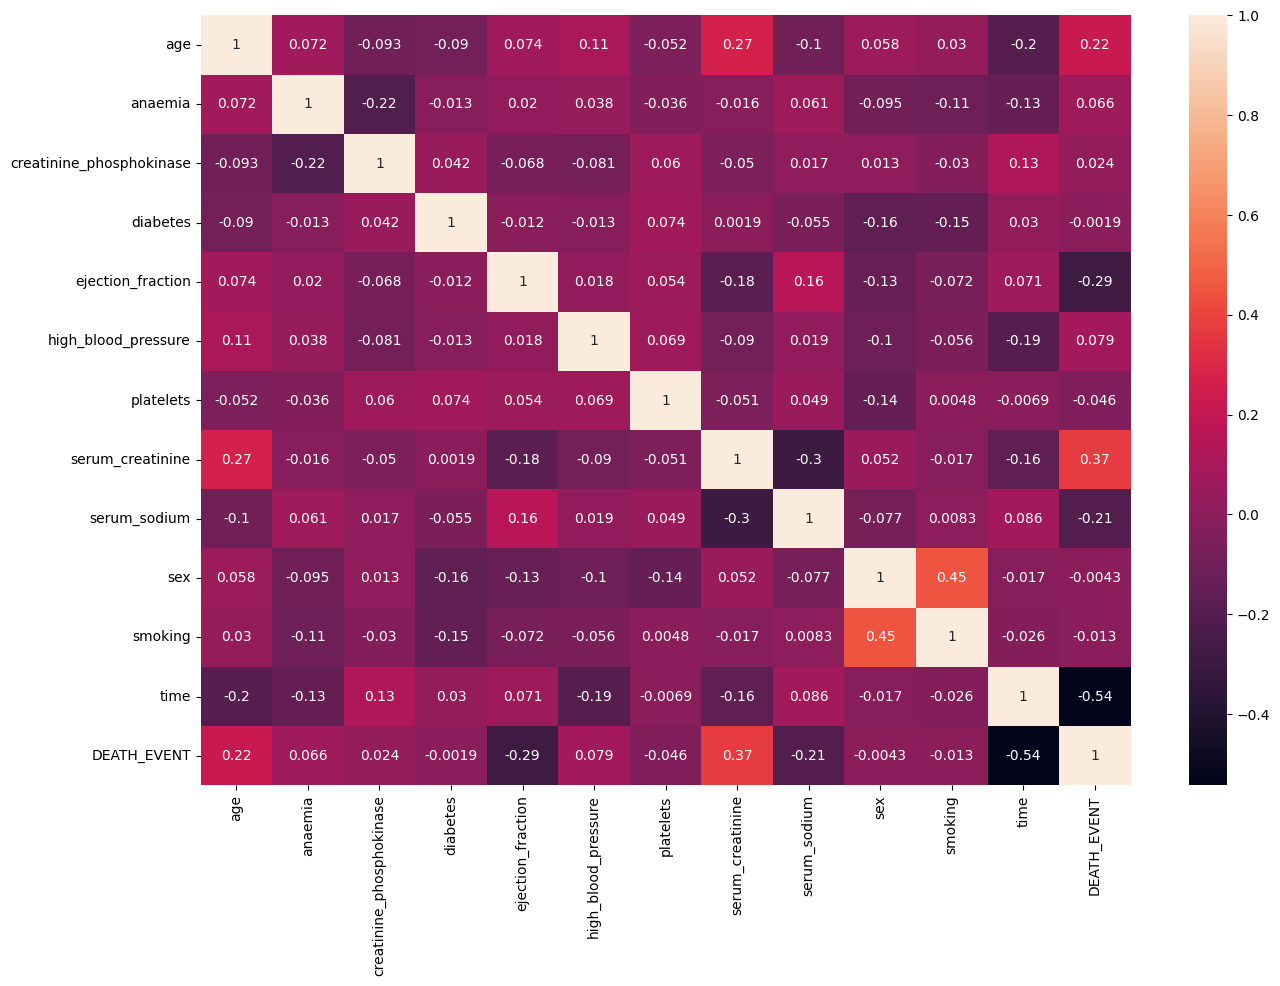

In [ ]:
corr = df.corr(method= 'spearman')
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

## save data

In [ ]:
df.to_csv('heart_failure_clinical_records-cleaned.csv', index=False)



---



In [5]:
df2 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Heart-Failure-Prediction/Variable_importance.xlsx')
df2

,Feature,Value
0,time,0.330644
1,serum_creatinine,0.157781
2,age,0.110400
3,ejection_fraction,0.101070
4,platelets,0.086534
5,creatinine_phosphokinase,0.078628
6,serum_sodium,0.068878
7,anaemia,0.016513
8,diabetes,0.013363
9,sex,0.013264


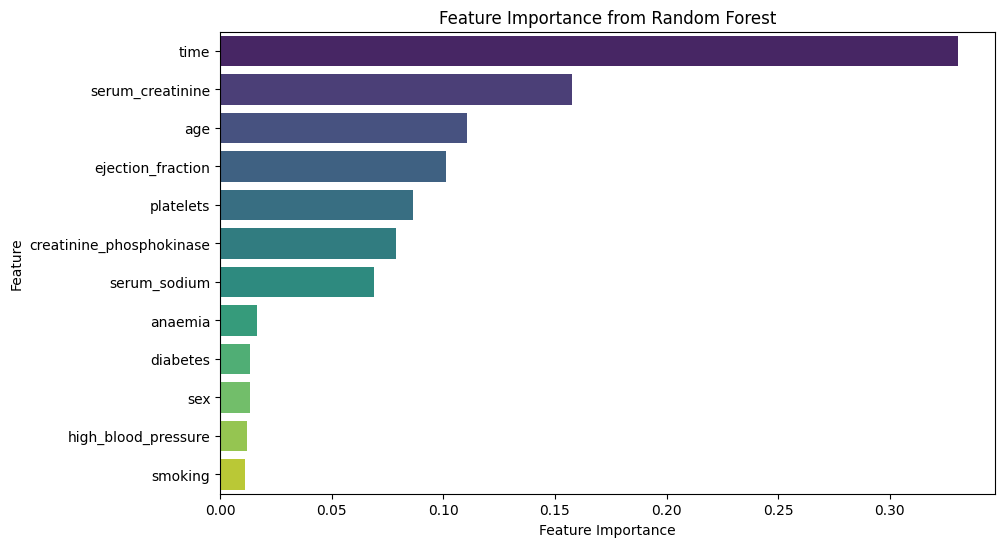

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df2["Value"], y=df2["Feature"], palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()